
# 🧠 Understanding Dropout in Neural Networks

This notebook explores **Dropout** as a regularization technique for deep learning, particularly when training on the MNIST dataset.

---



## 💡 What is Dropout?

**Dropout** is a regularization technique that randomly deactivates (or "drops out") a fraction of the neurons during training. The idea is simple: during each forward pass in training, some neurons are randomly set to zero.

This technique prevents the model from becoming too dependent on particular neurons and encourages it to learn more robust and generalized features.

---



## ❓ Why Do We Need Dropout If We Already Have Regularization (L1/L2)?

Traditional regularization techniques like **L1** and **L2** modify the loss function by penalizing the size or magnitude of the weights.

### Dropout vs L1/L2

| Technique         | Acts On         | Mechanism                                | Result                          |
|------------------|------------------|-------------------------------------------|----------------------------------|
| L1 Regularization | Weights          | Adds penalty $ \sum_{absolute}(w) $             | Sparse weights                   |
| L2 Regularization | Weights          | Adds penalty $ \sum w^2 $             | Shrinks weights                  |
| Dropout           | Activations      | Randomly disables neurons during training | Prevents co-adaptation; promotes robustness |

### 🔍 Key Difference:

Dropout introduces **stochasticity** during training. Each mini-batch sees a slightly different network architecture, forcing the model to **not rely on any one path** through the network.

---



## 🌟 Why is Dropout Important?

- Prevents overfitting by making the model less sensitive to noise in the training data.
- Forces the model to distribute its learning across many neurons.
- Improves **robustness** and generalization.

Dropout is especially useful in deep neural networks with many parameters where overfitting is a common issue.

---



## 🧪 Demonstration: Dropout in Practice on MNIST Dataset


In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import random




In [2]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [3]:

# Take only 1000 training samples
x_small_train = x_train[:300]
y_small_train = y_train[:300]


[0 1 2 3 4 5 6 7 8 9] [34 39 28 34 32 23 29 29 21 31]


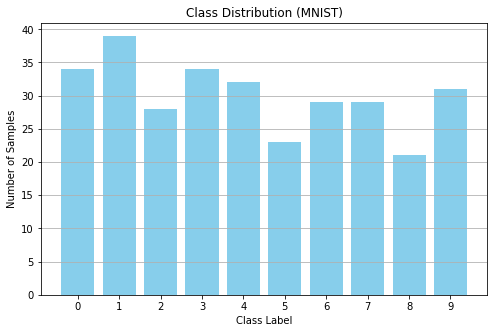

In [4]:
# Plot the bar chart
classes, counts = np.unique(y_small_train, return_counts=True)
print(classes, counts)
plt.figure(figsize=(8, 5))
plt.bar(classes, counts, tick_label=[str(c) for c in classes], color='skyblue')
plt.title("Class Distribution (MNIST)")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.show()


## 🏗️ Model with Dropout Layers


In [5]:

def create_dropout_model(dropout_rate=0.3):
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(512, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(256, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_dropout_model()



## 🚂 Train the Model with Dropout


In [6]:

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=2
)


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t


## 📊 Visualizing the Effect of Dropout


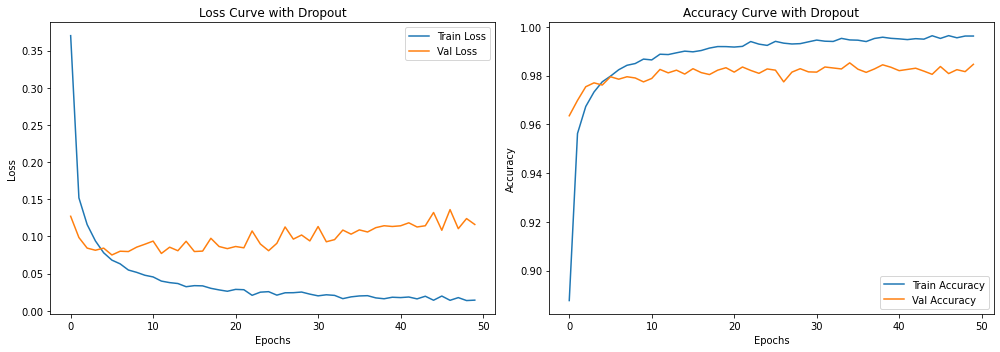

In [7]:

def plot_history(history):
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve with Dropout')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curve with Dropout')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


In [8]:
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=1)
# print(y_test[0:10])
# Show results
print(f"Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# Predict on test set
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)
print(y_pred[0:10])


print("Accuracy Report:\n", classification_report(y_test, y_pred))

313/313 [==============================] - 1s 3ms/step - loss: 0.0989 - accuracy: 0.9852
Accuracy: 0.9852, Loss: 0.0989
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[7 2 1 0 4 1 4 9 6 9]
Accuracy Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
 


## ✅ Conclusion

- Dropout adds noise to the training process, making the model less likely to memorize training data.
- It complements traditional regularization by acting directly on **neuronal activations**.
- Dropout helps achieve better **test accuracy and generalization**.

Try varying the `dropout_rate` (e.g., 0.2, 0.5) to see its impact.

---
